In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('data.csv', parse_dates=['Intake-DateTime', 'Outcome-DateTime'])
data.dtypes

AnimalID                         object
ID                               object
Breed                            object
Color                            object
Gender                           object
Name                             object
Intake-DateTime          datetime64[ns]
Intake-Type                      object
Intake-Condition                 object
Intake-Age(days)                  int64
Date-Of-Birth                    object
Outcome-DateTime         datetime64[ns]
Outcome-Type                     object
Outcome-Subtype                  object
Outcome-Age(days)                 int64
Age                              object
IsAdopted                          bool
Category                         object
Intelligence-Ranking              int64
Intelligence-Category            object
Size-Category                    object
Longevity                       float64
Total-Cost($)                     int64
Purchase-Cost($)                  int64
Food-Cost($)                      int64


In [56]:
data['ReFoundByShelter'] = data['ID'].str.contains('\+')
data

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days),...,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category,ReFoundByShelter
0,A006100,A006100,Spinone Italiano,Yellow,Male,Scamp,2014-03-07 14:26:00,Public Assist,Normal,2190,...,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget,False
1,A006100,A006100+,Spinone Italiano,Yellow,Male,Scamp,2014-12-19 10:21:00,Public Assist,Normal,2555,...,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget,True
2,A006100,A006100++,Spinone Italiano,Yellow,Male,Scamp,2017-12-07 14:07:00,Stray,Normal,3650,...,Sporting,27,Above-Average,Large,9.00,18062,1725,5679,Budget,True
3,A134067,A134067,Shetland Sheepdog,Brown,Male,Bandit,2013-11-16 09:02:00,Public Assist,Injured,12190,...,Herding,6,Brightest,Small,12.53,17469,465,3698,Saver,False
4,A141142,A141142,Labrador Retriever,Black,Female,Bettie,2013-11-16 14:46:00,Stray,Aged,11825,...,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85791,A893431,A893431,Chihuahua,Tricolor,Female,Chili,2023-11-21 11:21:00,Public Assist,Normal,2920,...,Toy,67,Fair,Small,16.50,22640,588,4594,High-End,False
85792,A893432,A893432,Chihuahua,Tan,Female,Coco,2023-11-21 11:21:00,Public Assist,Normal,2920,...,Toy,67,Fair,Small,16.50,22640,588,4594,High-End,False
85793,A893452,A893452,Maltese,White,Female,Sophie,2023-11-21 13:38:00,Public Assist,Normal,2555,...,Toy,59,Fair,Small,12.25,16073,650,2410,Saver,False
85794,A893529,A893529,Labrador Retriever,White,Female,Unknown,2023-11-22 14:26:00,Owner Surrender,Normal,30,...,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget,False


In [57]:
y = data.iloc[:,26:27]

In [58]:
X = data.iloc[:,:].drop(columns=["IsAdopted", "ReFoundByShelter", "AnimalID", "ID", "Intake-DateTime","Color", "Breed","Outcome-DateTime", "Intelligence-Category", "Date-Of-Birth","Name", "Intake-Condition", "Category","Outcome-Subtype", "Intake-Age(days)", "Cost-Category", "Outcome-Type", "Intake-Type", "Outcome-Age(days)"])
X

,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,Male,Adult,27,Large,9.00,18062,1725,5679
1,Male,Senior,27,Large,9.00,18062,1725,5679
2,Male,Senior,27,Large,9.00,18062,1725,5679
3,Male,Senior,6,Small,12.53,17469,465,3698
4,Female,Senior,7,Medium,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,Female,Senior,67,Small,16.50,22640,588,4594
85792,Female,Senior,67,Small,16.50,22640,588,4594
85793,Female,Senior,59,Small,12.25,16073,650,2410
85794,Female,Baby,7,Medium,12.04,18422,810,4819


In [59]:
# replace all the descriptive lable into numerical lable
gender = X.groupby('Gender').size()
X['Gender'].replace(['Female','Male'], [0,1], inplace=True)
SizeCategory = X.groupby('Size-Category').size()
X['Size-Category'].replace(['Large','Medium','Small'], [3,2,1], inplace=True)
Age = X.groupby('Age').size()
X['Age'].replace(['Baby','Young','Adult', 'Senior'], [1,2,3,4], inplace=True)
X

,Gender,Age,Intelligence-Ranking,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($)
0,1,3,27,3,9.00,18062,1725,5679
1,1,4,27,3,9.00,18062,1725,5679
2,1,4,27,3,9.00,18062,1725,5679
3,1,4,6,1,12.53,17469,465,3698
4,0,4,7,2,12.04,18422,810,4819
...,...,...,...,...,...,...,...,...
85791,0,4,67,1,16.50,22640,588,4594
85792,0,4,67,1,16.50,22640,588,4594
85793,0,4,59,1,12.25,16073,650,2410
85794,0,1,7,2,12.04,18422,810,4819


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [62]:
# Choose the maximum depth of the tree (you can experiment with different values)
max_depth = 3

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred = decision_tree.predict(X_test_scaled)

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report with zero_division parameter set to 1
report = classification_report(y_test, y_pred, zero_division=1)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8474941724941725
Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92     14543
        True       1.00      0.00      0.00      2617

    accuracy                           0.85     17160
   macro avg       0.92      0.50      0.46     17160
weighted avg       0.87      0.85      0.78     17160



In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Convert y_train to a NumPy array and then use ravel()
y_train_np = y_train.values.ravel()

# Define a range of values for the hyperparameter (in this case, max_depth)
max_depth_values = [i for i in range(1, 31)]
scores = []

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Calculate cross-validation scores for different values of max_depth
for max_depth in max_depth_values:
    dt_classifier.set_params(max_depth=max_depth)  # Set the max_depth hyperparameter
    score = cross_val_score(dt_classifier, X_train_scaled, y_train_np, cv=5)
    scores.append(np.mean(score))

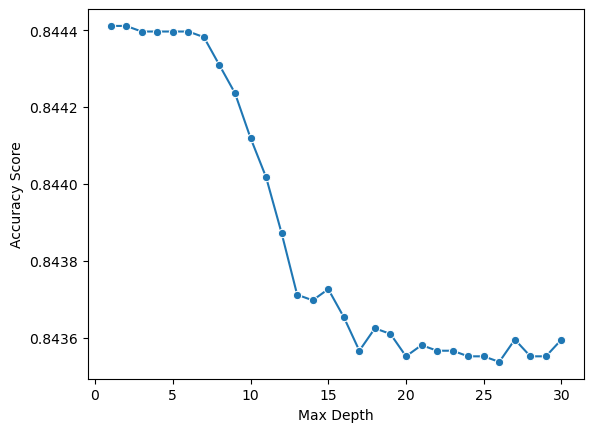

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=max_depth_values, y=scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.show()

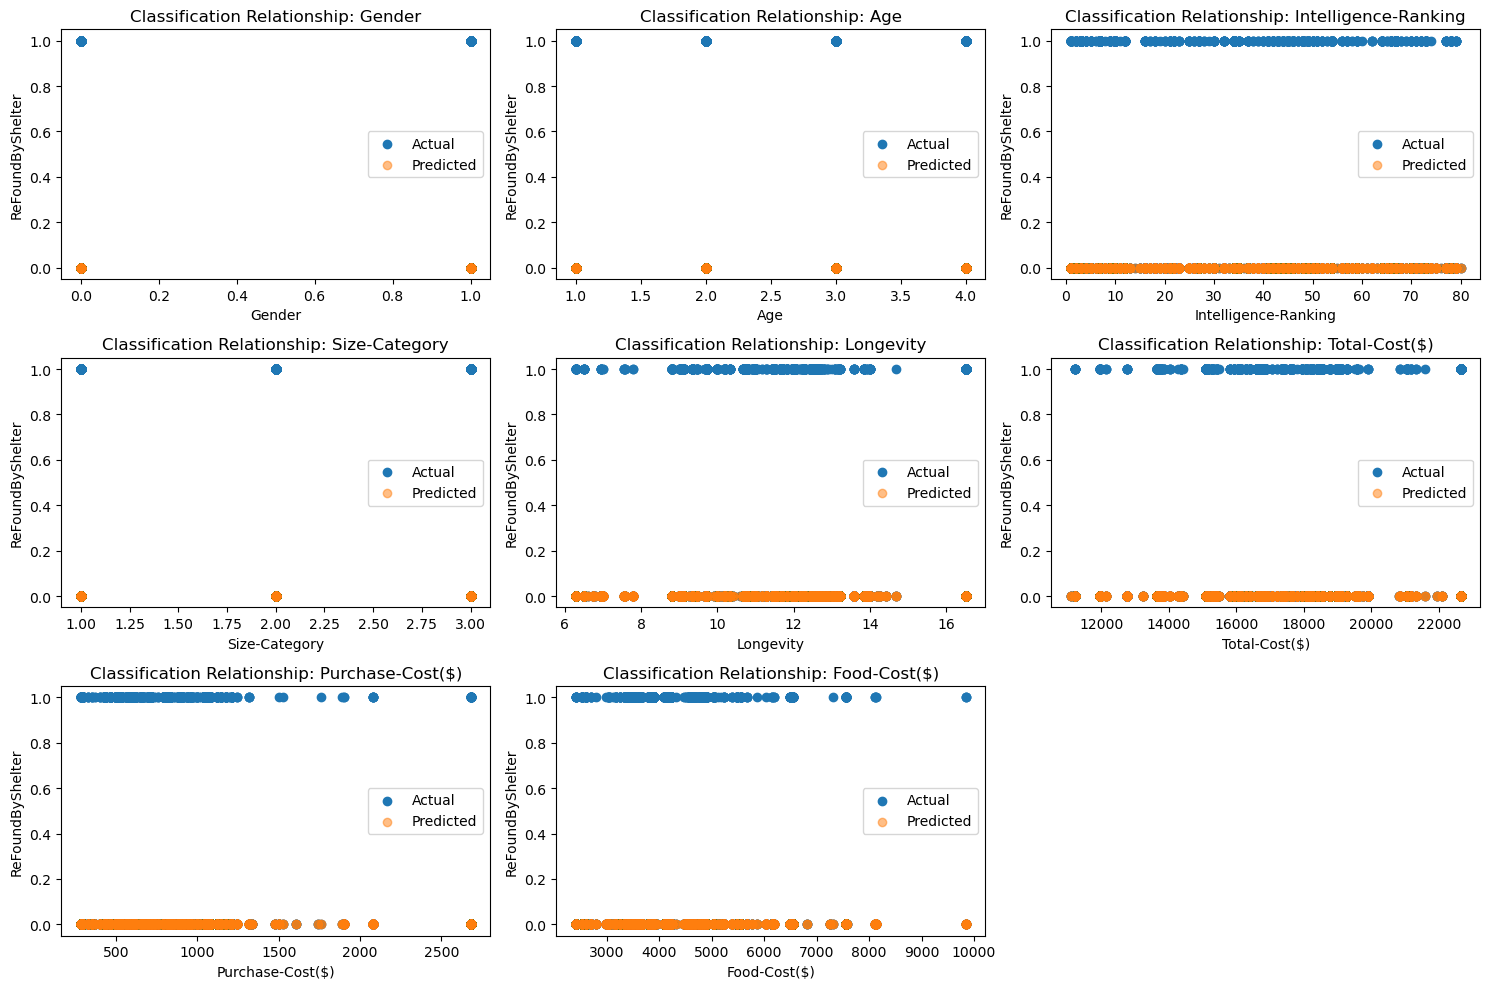

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Feature names
names = ["Gender", "Age", "Intelligence-Ranking", "Size-Category", "Longevity", "Total-Cost($)", "Purchase-Cost($)", "Food-Cost($)"]

plt.figure(figsize=(15, 10))

# Initialize variables to store evaluation metrics
accuracies = []
precisions = []
recalls = []

# Iterate over each feature
for i, name in enumerate(names):
    plt.subplot(3, 3, i + 1)
    
    # Extract the current feature
    x = X[name].values.reshape(-1, 1)
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Create Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(max_depth=None)  # You can set max_depth if needed
    
    # Train the model
    dt_classifier.fit(x_train, y_train)
    
    # Visualize decision boundary for multiclass classification
    if len(y['ReFoundByShelter'].unique()) > 2:
        # Visualization for multiclass classification (modify as needed)
        # You can use scatter plots or other visualization techniques
        # depending on the number of classes in 'ReFoundByShelter'
        # For example, you can use different colors for different classes
        classes = y['ReFoundByShelter'].unique()
        for class_label in classes:
            mask = y_test == class_label
            plt.scatter(x_test[mask], [class_label] * mask.sum(), label=f'Actual {class_label}')
            plt.scatter(x_test[mask], dt_classifier.predict(x_test)[mask], label=f'Predicted {class_label}', marker='o', alpha=0.5)
    else:
        # Binary classification visualization
        plt.scatter(x_test, y_test, label='Actual')
        plt.scatter(x_test, dt_classifier.predict(x_test), label='Predicted', marker='o', alpha=0.5)

        plt.title(f"Classification Relationship: {name}")
        plt.xlabel(name)
        plt.ylabel('ReFoundByShelter')
        plt.legend()
    
    # Evaluate the model on the test set
    y_pred = dt_classifier.predict(x_test)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

    # Append evaluation metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

plt.tight_layout()
plt.show()


# Visualization

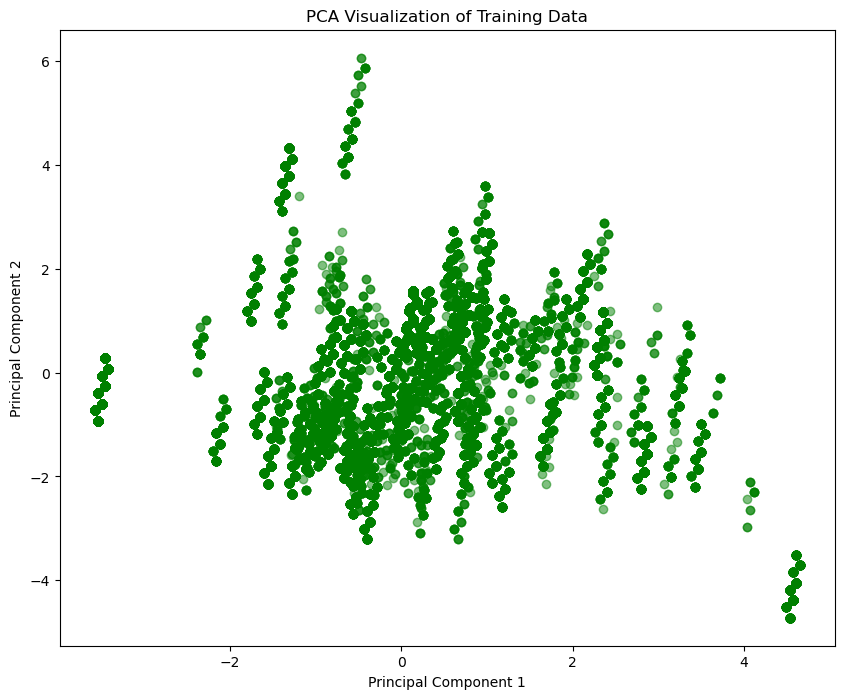

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Convert boolean values in y_train to colors
colors = ['green' if is_adopted else 'red' for is_adopted in y_train]

# Plot the data points in 2D space with color-coded classes
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=colors, alpha=0.5)
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Conclusion

Key Findings:
Traditional factors like age, gender, size, and total cost of ownership do not significantly influence pet adoption.
Important influencers in adoption decisions are total maintenance cost, including food and healthcare, and the pet’s perceived intelligence level.

Model Performance:
The Decision Tree Classifier shows improved performance when analyzing all features collectively rather than individually.
This indicates that pet adoption is influenced by a combination of various factors, necessitating a holistic approach for accurate analysis.